## Entrenar el modelo de Deep Learning

## Paso 1:
- Cargar los datos previamente procesados

In [1]:
# Carga de las librerias necesarias
import os
import numpy as np
import cv2
import gc

In [2]:
# Cargar la data preprocesada
data = np.load('./Data/data_preprocesada_v1.npz')

In [3]:
X = data['arr_0']
y = data['arr_1']

In [4]:
X.shape, y.shape

((7816, 100, 100, 3), (7816,))

## Paso 2:
- Preprosesar "y"

In [5]:
np.unique(y)

array(['with_mask', 'without_mask'], dtype='<U12')

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1))

In [8]:
y_array = y_onehot.toarray()

In [9]:
y_array.shape

(7816, 2)

## Paso 3:
- Separar los datos en sets de entrenamiento y test respectivamente

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y_array, test_size=0.2, random_state=42)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6252, 100, 100, 3), (1564, 100, 100, 3), (6252, 2), (1564, 2))

## Paso 4:
- Diseno y creacion del modelo de Deep Learning

In [12]:
# Importar las librerias necesarias para la creacion del modelo
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [13]:
# Version 1 - 3
# Diseñar la estuctura de la red neuronal convolucional

model = Sequential([
    layers.Conv2D(16,3,padding='same', input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(28,activation='relu'),
    layers.Dense(2,activation='sigmoid')
])

# Compilar el modelo de red neuronal convolucional. Configurar el optimizador "Adam" y la función de pérdida
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [17]:
""""Version 4 (Borrada)
model = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=2, activation='softmax')
])

# compile the model with Adam optimizer and categorical cross-entropy loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])"""

In [30]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Cargar el modelo VGG16 preentrenado y descargar los pesos preentrenados
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100,100,3))

for layer in base_model.layers:
    layer.trainable = False

# Agregar las capas necesarias para producir la salida deseada
x = base_model.output
x = Flatten()(x)
x = Dense(192, activation='relu')(x)
x = Dense(28, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x)

# Crear el modelo final a partir de la base preentrenada y las capas agregadas
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo final
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [15]:
# Entrenar la red Neuronal con los parametros necesarios
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=10)

Epoch 1/10
209/209 [==============================] - 41s 186ms/step - loss: 0.1603 - accuracy: 0.9471 - val_loss: 0.0624 - val_accuracy: 0.9770
Epoch 2/10
209/209 [==============================] - 36s 172ms/step - loss: 0.0615 - accuracy: 0.9798 - val_loss: 0.0527 - val_accuracy: 0.9821
Epoch 3/10
209/209 [==============================] - 50s 238ms/step - loss: 0.0449 - accuracy: 0.9853 - val_loss: 0.0366 - val_accuracy: 0.9872
Epoch 4/10
209/209 [==============================] - 50s 238ms/step - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.0359 - val_accuracy: 0.9872
Epoch 5/10
209/209 [==============================] - 35s 169ms/step - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.0363 - val_accuracy: 0.9872
Epoch 6/10
209/209 [==============================] - 34s 163ms/step - loss: 0.0279 - accuracy: 0.9918 - val_loss: 0.0330 - val_accuracy: 0.9885
Epoch 7/10
209/209 [==============================] - 35s 168ms/step - loss: 0.0265 - accuracy: 0.9918 - val_loss: 0.0335 - val_ac

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Crear la tabla con los datos de perdida y presicion
history_df = pd.DataFrame(history.history)

In [18]:
# Mostrar la tabla con los datos de perdida y presicion
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.160336,0.947057,0.062350,0.976982
1,0.061515,0.979846,0.052686,0.982097
2,0.044950,0.985285,0.036592,0.987212
3,0.038948,0.987684,0.035936,0.987212
4,0.034748,0.989443,0.036309,0.987212
5,0.027888,0.991843,0.033006,0.988491
6,0.026475,0.991843,0.033467,0.989130
7,0.020916,0.994562,0.030392,0.990409
8,0.020805,0.993442,0.033731,0.986573
9,0.016617,0.995521,0.042098,0.987212


<function matplotlib.pyplot.show(close=None, block=None)>

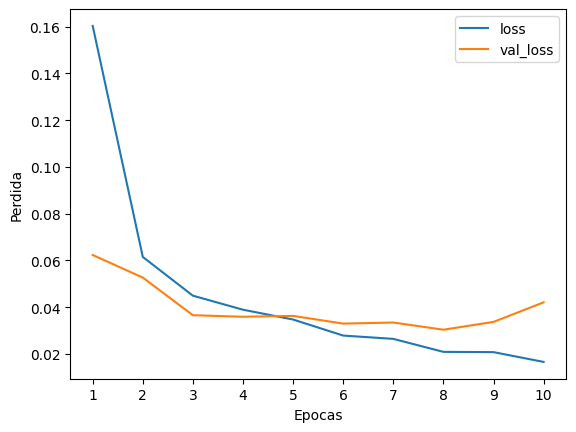

In [19]:
# Grafica de Perdida vs epocas
history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

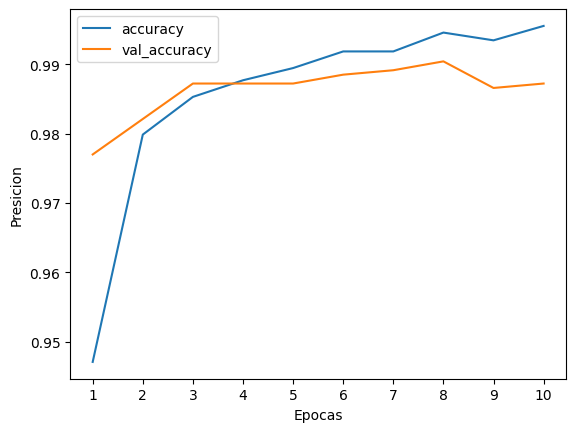

In [20]:
# Grafica de Presicion vs epocas
history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epocas')
plt.ylabel('Presicion')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show

In [21]:
# Guardar el modelo diseñado
model.save('modelo_cnn_deteccion_mascarillas_AG_MT_V1')

INFO:tensorflow:Assets written to: modelo_cnn_deteccion_mascarillas_AG_MT_V1\assets


INFO:tensorflow:Assets written to: modelo_cnn_deteccion_mascarillas_AG_MT_V1\assets
